In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import math

from utils.functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[ 1.23404735 -1.74227915 -0.0847245   0.19678671 -2.00006774 -2.8612939
 -0.14395756]


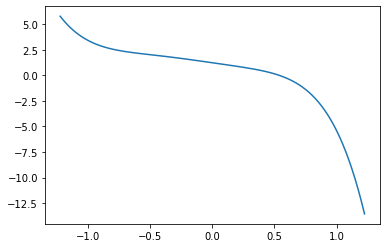

In [3]:
f_deg = 6

mu, sigma = 0, 1 # mean and standard deviation
f = np.random.normal(mu, sigma, f_deg  + 1)

print(f)

def plot_f(f, x_array):
    y_array = np.zeros(len(x_array))
    for deg in range(len(f)):
        y_array += f[deg] * (x_array ** deg)
        
    plt.plot(x_array, y_array)

x_array = (np.array(range(1,100)) - 50)/40
plot_f(f, x_array)

# 1. Before adding Gaussian Noise

## 1.1. Berrut Approximation Encoding

Input:  [[-0.29364917 -0.01061775]
 [ 0.82230901  0.28353109]
 [-0.31009363 -0.26117518]
 [-0.22293378  0.93350258]
 [ 0.69223016  0.41846496]
 [ 0.09071396 -0.83477354]] 

j:  [0.26179939 0.78539816 1.30899694 1.83259571 2.35619449 2.87979327] 

alpha_array:  [ 0.96592583  0.70710678  0.25881905 -0.25881905 -0.70710678 -0.96592583] 

z_array:  [ 1.          0.9781476   0.91354546  0.80901699  0.66913061  0.5
  0.30901699  0.10452846 -0.10452846 -0.30901699 -0.5        -0.66913061
 -0.80901699 -0.91354546 -0.9781476 ] 

@BACC_Enc: N,K, m_i= 15 6 1 

shape of X_tilde=  (15, 1, 2)


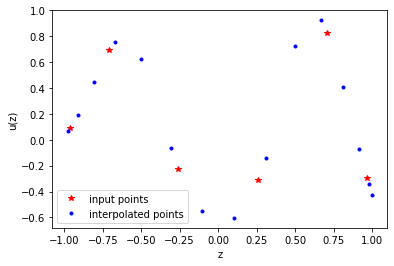

In [4]:
N=15
K= 6
d = 2
m = 6

input_array = np.random.uniform(low=-1.0, high=1.0, size=(m,d))

print("Input: ",input_array,'\n')

j_array = np.array(range(K))
print("j: ",(2*j_array+1)*math.pi/2/K,'\n')

alpha_array = np.cos((2*j_array+1)*math.pi/(2*K)) #np.cos((2*j_array+1)*math.pi/(2*K))
print("alpha_array: ",alpha_array,'\n')

i_array = np.array(range(N))
z_array = np.cos(i_array*2*math.pi/N/2) # np.cos(i_array*2*math.pi/N/2)
print("z_array: ",z_array,'\n')




    
X_tilde = BACC_Enc(input_array, alpha_array, z_array)

print('shape of X_tilde= ',np.shape(X_tilde))

# check Encoding
plt.plot(alpha_array, input_array[:,0],'r*',label='input points')
plt.plot(z_array, X_tilde[:,0,0],'b.',label='interpolated points')
plt.xlabel('z')
plt.ylabel('u(z)')
plt.legend()
plt.show()

## 1.2. Local computation

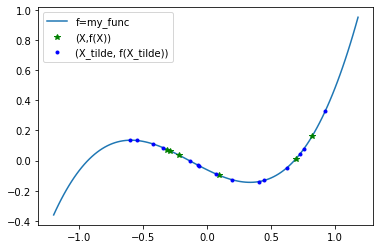

In [5]:
def my_func(inputs):
    outputs = np.zeros(len(inputs))
    
    for i in range(len(inputs)):
        x = inputs[i]
        outputs[i] = - 0.2* x * np.cos(x) + 0.6*(x-0.55)*(x+0.25)*(x+0.75)
    return outputs

my_inputs = (np.array(range(120))-60)/50
my_outputs = my_func(my_inputs)

X_array = input_array[:,0]
Y_array = my_func(X_array)

Y_tilde = my_func(X_tilde[:,0,0])

plt.plot(my_inputs, my_outputs, label='f=my_func')
plt.plot(X_array, Y_array, 'g*', label='(X,f(X))')
plt.plot(X_tilde[:,0,0], Y_tilde, 'b.', label='(X_tilde, f(X_tilde))')
plt.legend()
plt.show()

## 1.3. BACC decoding

(15, 1, 1)
Number of received results = 15 (out of 15)


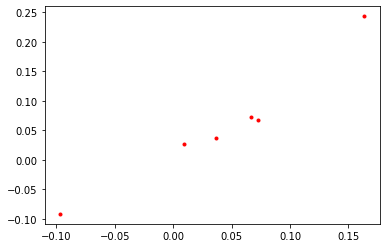

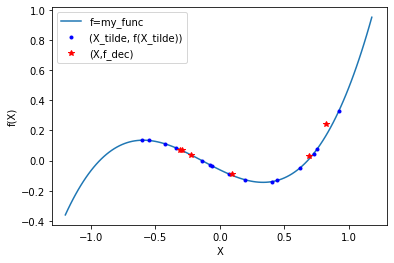

Number of received results = 10 (out of 15)


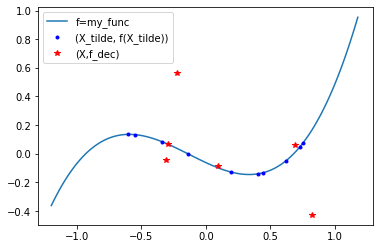

Number of received results = 6 (out of 15)
[ 9  7  1 13  6 10]
[-0.06483998 -0.60413498 -0.3420046   0.19405537 -0.13757759  0.62111144]


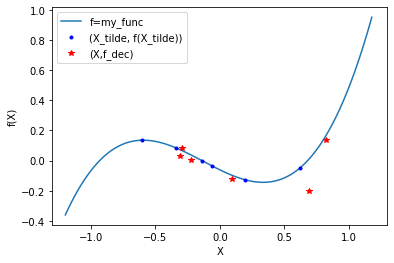

[-0.3420046  -0.13757759 -0.60413498 -0.06483998  0.62111144  0.19405537]


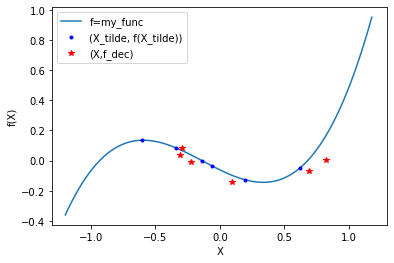

In [6]:
f_tilde = Y_tilde
f_tilde = np.reshape(f_tilde,(N,1,1))
print(np.shape(f_tilde))


print("Number of received results = 15 (out of 15)")
f_dec = BACC_Dec(f_tilde, alpha_array, z_array)
# print(f_dec)
# print(Y_array)

plt.plot(Y_array, np.reshape(f_dec,K), 'r.')
plt.show()

plt.plot(my_inputs, my_outputs, label='f=my_func')
plt.plot(X_tilde[:,0,0], Y_tilde, 'b.', label='(X_tilde, f(X_tilde))')
plt.plot(X_array, np.reshape(f_dec,K), 'r*', label='(X,f_dec)')
plt.legend()
plt.xlabel('X')
plt.ylabel('f(X)')
plt.xlim([-1.3,1.3])
plt.show()

print("Number of received results = 10 (out of 15)")
idxs_users = np.random.choice(range(N), 10, replace=False)
f_dec = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array, z_array[idxs_users])
# print(f_dec)
# print(Y_array)


plt.plot(my_inputs, my_outputs, label='f=my_func')
plt.plot(X_tilde[idxs_users,0,0], Y_tilde[idxs_users], 'b.', label='(X_tilde, f(X_tilde))')
plt.plot(X_array, np.reshape(f_dec,K), 'r*', label='(X,f_dec)')
plt.legend()
plt.xlim([-1.3,1.3])
plt.show()

print("Number of received results = 6 (out of 15)")
idxs_users = np.random.choice(range(N), 6, replace=False)
# idxs_users = [10,3,1,7,9,5]
print(idxs_users)
print(X_tilde[idxs_users,0,0])
f_dec = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array, z_array[idxs_users])
# print(f_dec)
# print(Y_array)


plt.plot(my_inputs, my_outputs, label='f=my_func')
plt.plot(X_tilde[idxs_users,0,0], Y_tilde[idxs_users], 'b.', label='(X_tilde, f(X_tilde))')
plt.plot(X_array, np.reshape(f_dec,K), 'r*', label='(X,f_dec)')
plt.xlim([-1.3,1.3])
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.show()

idxs_users = np.sort(idxs_users)
print(X_tilde[idxs_users,0,0])
f_dec = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array, z_array[idxs_users])
# print(f_dec)
# print(Y_array)

plt.plot(my_inputs, my_outputs, label='f=my_func')
plt.plot(X_tilde[idxs_users,0,0], Y_tilde[idxs_users], 'b.', label='(X_tilde, f(X_tilde))')
plt.plot(X_array, np.reshape(f_dec,K), 'r*', label='(X,f_dec)')
plt.xlim([-1.3,1.3])
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.show()

## 1.4 Interpret the BACC enc/dec with f(x) = - 0.2* x * np.cos(x) + 0.6*(x-0.55)*(x+0.25)*(x+0.75)

@BACC_Enc: N,K, m_i= 1000 6 1 

@BACC_Enc: N,K, m_i= 15 6 1 



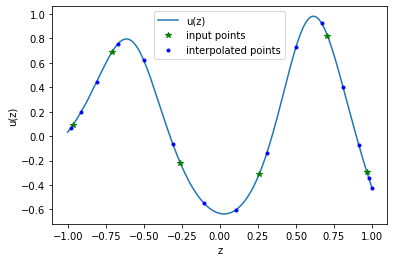

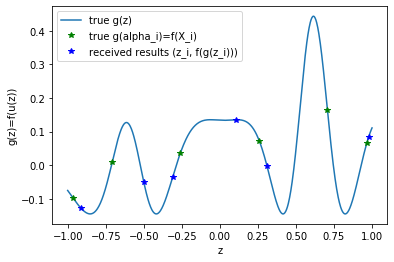

Number of received results = 15 (out of 15)
selected index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


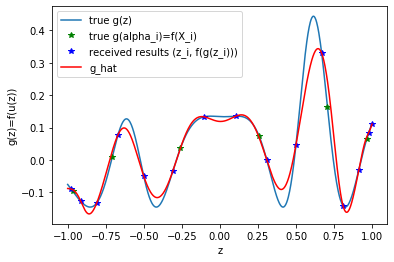

Number of received results = 6 (out of 15)
selected index: [ 3  1  6  7  9 11]


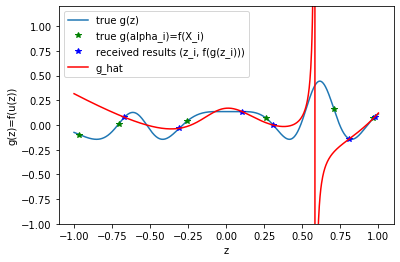

Number of received results = 6 (out of 15)
selected index: [ 1  3  6  7  9 11]


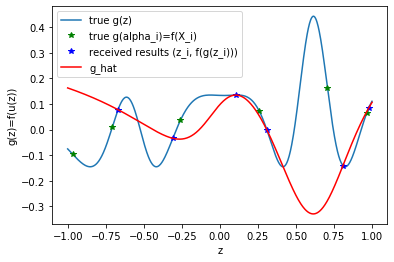

Number of received results = 5
selected index: [ 3  6  7 10 14]


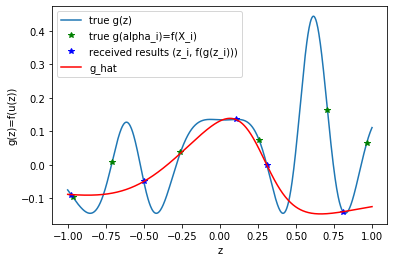

Number of received results = 6
selected index: [ 1  3  8 10 11 12]


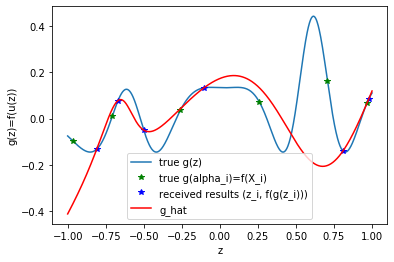

Number of received results = 7
selected index: [ 1  2  3  7  9 11 12]


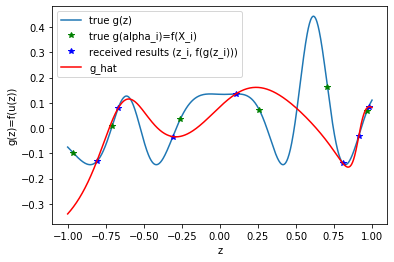

Number of received results = 8
selected index: [ 0  2  3  6  7  9 12 13]


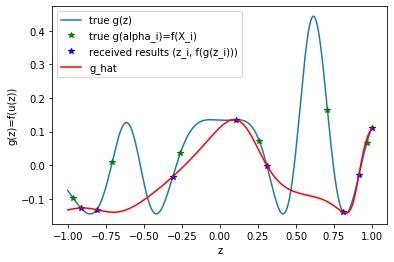

Number of received results = 9
selected index: [ 0  1  3  4  5  8 12 13 14]


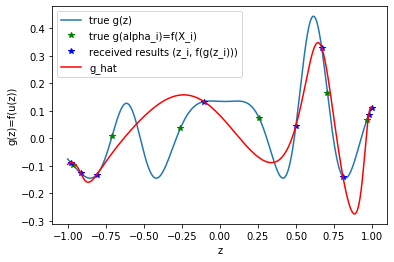

Number of received results = 10
selected index: [ 2  5  6  7  8  9 10 11 13 14]


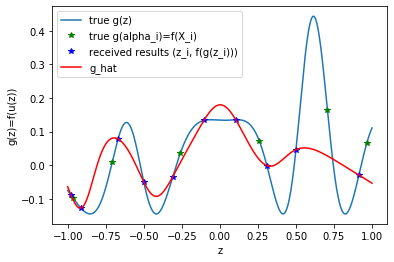

Number of received results = 11
selected index: [ 0  1  2  4  6  7  8  9 12 13 14]


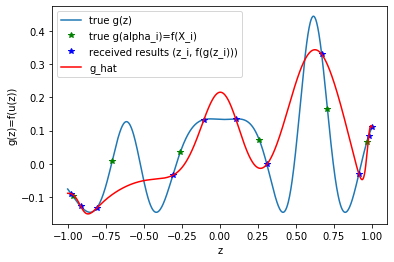

Number of received results = 12
selected index: [ 0  2  3  4  5  6  7  9 10 11 13 14]


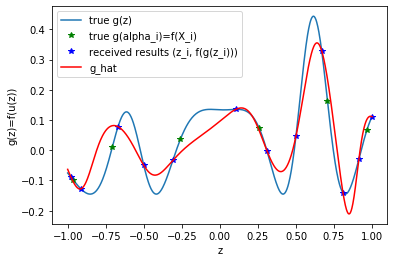

Number of received results = 13
selected index: [ 0  1  2  3  4  5  6  7 10 11 12 13 14]


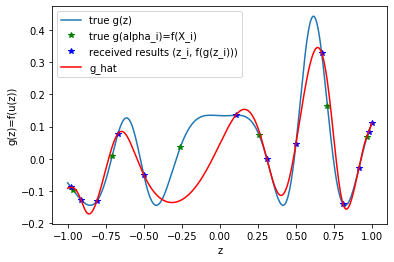

Number of received results = 14
selected index: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14]


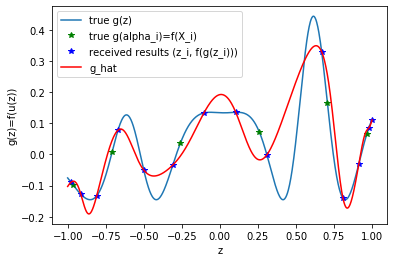

In [7]:
def my_func(inputs):
    outputs = np.zeros(len(inputs))
    
    for i in range(len(inputs)):
        x = inputs[i]
        outputs[i] = - 0.2* x * np.cos(x) + 0.6*(x-0.55)*(x+0.25)*(x+0.75)
    return outputs

my_inputs = (np.array(range(120))-60)/50
my_outputs = my_func(my_inputs)

X_array = input_array[:,0]
Y_array = my_func(X_array)

Y_tilde = my_func(X_tilde[:,0,0])

f_tilde = Y_tilde
f_tilde = np.reshape(f_tilde,(N,1,1))

K_=1000

j_array_ = np.array(range(K_))
alpha_array_ = np.cos((2*j_array_+1)*math.pi/(2*K_)) #np.cos((2*j_array+1)*math.pi/(2*K))
alpha_idx = np.argsort(alpha_array_)
# print(alpha_array_[alpha_idx])

X_tilde_ = BACC_Enc(input_array, alpha_array, alpha_array_)
Y_tilde_ = my_func(X_tilde_[:,0,0])

X_tilde = BACC_Enc(input_array, alpha_array, z_array)

plt.plot(alpha_array_,X_tilde_[:,0,0], label='u(z)')
plt.plot(alpha_array,input_array[:,0],'g*', label='input points')
plt.plot(z_array, X_tilde[:,0,0],'b.',label='interpolated points')
plt.xlabel('z')
plt.ylabel('u(z)')
plt.legend()
plt.show()

f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
# plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
plt.xlabel('z')
plt.ylabel('g(z)=f(u(z))')
plt.legend()
plt.show()

print("Number of received results = 15 (out of 15)")
idxs_users = np.random.choice(range(N), 15, replace=False)
idxs_users = np.sort(idxs_users)
print("selected index:", idxs_users)

f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
plt.xlabel('z')
plt.ylabel('g(z)=f(u(z))')
plt.legend()
plt.show()

print("Number of received results = 6 (out of 15)")
# idxs_users = np.random.choice(range(N), 6, replace=False)
idxs_users = np.array([3,  1, 6,  7,  9,  11])
print("selected index:", idxs_users)

f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
plt.xlabel('z')
plt.ylabel('g(z)=f(u(z))')
plt.ylim([-1,1.2])
plt.legend()
plt.show()

print("Number of received results = 6 (out of 15)")
idxs_users = np.sort(idxs_users)
print("selected index:", idxs_users)

f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
plt.xlabel('z')
plt.ylabel('g(z)=f(u(z))')
plt.legend()
plt.show()


for n in range(5,15):
    print("Number of received results =",n)
    idxs_users = np.random.choice(range(N), n, replace=False)
    idxs_users = np.sort(idxs_users)
    print("selected index:", idxs_users)

    f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
    plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
    plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
    plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
    plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
    plt.xlabel('z')
    plt.ylabel('g(z)=f(u(z))')
    plt.legend()
    plt.show()

## 1.5 Interpret the BACC enc/dec with f(x) = 0.5*x - 0.1

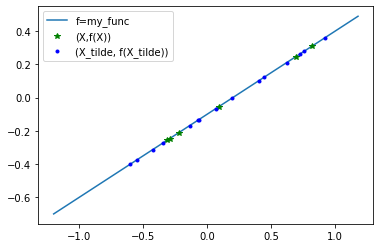

@BACC_Enc: N,K, m_i= 1000 6 1 



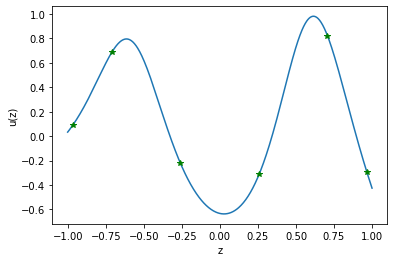

Number of received results = 15 (out of 15)
selected index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


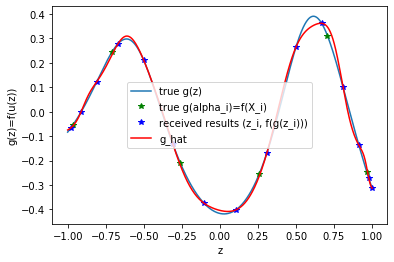

Number of received results = 6 (out of 15)
selected index: [ 3  1  6  7  9 11]


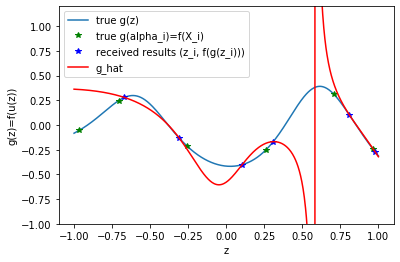

Number of received results = 6 (out of 15)
selected index: [ 1  3  6  7  9 11]


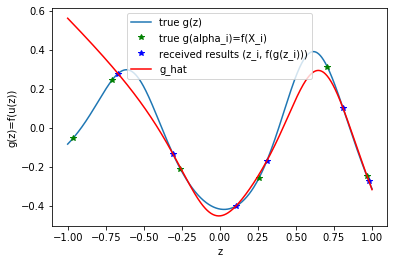

In [8]:
def my_func(inputs):
    outputs = np.zeros(len(inputs))
    
    for i in range(len(inputs)):
        x = inputs[i]
        outputs[i] =  0.5 * x - 0.1
    return outputs

my_inputs = (np.array(range(120))-60)/50
my_outputs = my_func(my_inputs)

X_array = input_array[:,0]
Y_array = my_func(X_array)

Y_tilde = my_func(X_tilde[:,0,0])

f_tilde = Y_tilde
f_tilde = np.reshape(f_tilde,(N,1,1))

plt.plot(my_inputs, my_outputs, label='f=my_func')
plt.plot(X_array, Y_array, 'g*', label='(X,f(X))')
plt.plot(X_tilde[:,0,0], Y_tilde, 'b.', label='(X_tilde, f(X_tilde))')
plt.legend()
plt.show()

K_=1000

j_array_ = np.array(range(K_))
alpha_array_ = np.cos((2*j_array_+1)*math.pi/(2*K_)) #np.cos((2*j_array+1)*math.pi/(2*K))
alpha_idx = np.argsort(alpha_array_)
# print(alpha_array_[alpha_idx])

X_tilde_ = BACC_Enc(input_array, alpha_array, alpha_array_)
Y_tilde_ = my_func(X_tilde_[:,0,0])

plt.plot(alpha_array_,X_tilde_[:,0,0])
plt.plot(alpha_array,input_array[:,0],'g*')
plt.xlabel('z')
plt.ylabel('u(z)')
plt.show()

print("Number of received results = 15 (out of 15)")
idxs_users = np.random.choice(range(N), 15, replace=False)
idxs_users = np.sort(idxs_users)
print("selected index:", idxs_users)

f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
plt.xlabel('z')
plt.ylabel('g(z)=f(u(z))')
plt.legend()
plt.show()

print("Number of received results = 6 (out of 15)")
# idxs_users = np.random.choice(range(N), 6, replace=False)
idxs_users = np.array([  3, 1, 6,    7,  9, 11])
print("selected index:", idxs_users)

f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
plt.xlabel('z')
plt.ylabel('g(z)=f(u(z))')
plt.ylim([-1,1.2])
plt.legend()
plt.show()

print("Number of received results = 6 (out of 15)")
idxs_users = np.sort(idxs_users)
print("selected index:", idxs_users)

f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
plt.xlabel('z')
plt.ylabel('g(z)=f(u(z))')
plt.legend()
plt.show()

# 2. BACC with MNIST dataset

# 2.1. Encoding

In [89]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import copy
import numpy as np
from torchvision import datasets, transforms
import torch

from utils.sampling import mnist_iid, mnist_noniid, cifar_iid
from utils.options import args_parser
from models.Update import LocalUpdate
from models.Nets import MLP, CNNMnist, CNNCifar, LeNet, CNNMnist2
from models.Fed import FedAvg
from models.Fed import FedQAvg, Quantization, Quantization_Finite, my_score, my_score_Finite
from models.test import test_img
from torch.utils.data import DataLoader, Dataset

%load_ext autoreload
%autoreload 2

class DatasetSplit(Dataset):
    def __init__(self, dataset, idxs):
        self.dataset = dataset
        self.idxs = list(idxs)

    def __len__(self):
        return len(self.idxs)

    def __getitem__(self, item):
        image, label = self.dataset[self.idxs[item]]
        return image, label

class my_argument:    
    epochs = 200    #"rounds of training"
    num_users = 15  # "number of users: N"
    num_partition = 6 # "number of users: K"
    frac = 0.5 #"the fraction of clients: C"
    local_ep = 1 #"the number of local epochs: E"
    local_bs = 200 #"local batch size: B"
    bs=200 #"test batch size"
    lr=0.01 #"learning rate"
    momentum=0.5 # "SGD momentum (default: 0.5)"
    split='user' # "train-test split type, user or sample"
    opt='ADAM'
    loss='Custom' # 'Custom' or 'Default'

    # model arguments
    model = 'cnn'
    kernel_num=9 #, help='number of each kind of kernel')
    kernel_sizes='3,4,5' #  help='comma-separated kernel size to use for convolution')
    norm='None' #, help="batch_norm, layer_norm, or None")
    num_filters=32 #, help="number of filters for conv nets")
    max_pool='True' #help="Whether use max pooling rather than strided convolutions")

    # other arguments
    dataset='mnist' #, help="name of dataset")
    iid=1
    num_classes=10#, help="number of classes")
    num_channels=1#, help="number of channels of imges")
    gpu=1#, help="GPU ID, -1 for CPU")
    stopping_rounds=10#, help='rounds of early stopping')
    verbose='False'#, help='verbose print')
    seed=1#, help='random seed (default: 1)')
    
args = my_argument()

args.device = torch.device('cuda:{}'.format(args.gpu) if torch.cuda.is_available() and args.gpu != -1 else 'cpu')

# load dataset and split users
trans_mnist = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
dataset_train = datasets.MNIST('../data/mnist/', train=True, download=True, transform=trans_mnist)
dataset_test = datasets.MNIST('../data/mnist/', train=False, download=True, transform=trans_mnist)

dict_users = mnist_iid(dataset_train, args.num_partition)

encoding_input_array_np = np.empty((len(dataset_train),28*28))
encoding_label_array_np = np.empty((len(dataset_train),args.num_classes))
print("size of X:" ,encoding_input_array_np.shape)
print("size of Y:" ,encoding_label_array_np.shape)

Size_submatrices = int(60000/args.num_partition)

for i in range(args.num_partition):
    
    stt_pos = i*Size_submatrices
    end_pos = (i+1)*Size_submatrices
#     print(i,stt_pos,end_pos)
    Temp_train = DataLoader(DatasetSplit(dataset_train, dict_users[i]), batch_size=Size_submatrices, shuffle=True)
    
    for batch_idx, (images, labels) in enumerate(Temp_train):
        
        images_np = images.detach().cpu().numpy()
        encoding_input_array_np[stt_pos:end_pos,:] = np.reshape(images_np, (Size_submatrices,28*28))
#         print(encoding_input_array_np[stt_pos:end_pos,:].shape)

        onehot_labels = torch.nn.functional.one_hot(labels,num_classes=args.num_classes)
        labels_np = onehot_labels.detach().cpu().numpy()
#         print(labels_np.shape)
        encoding_label_array_np[stt_pos:end_pos,:] = labels_np


# print(labels_np[0:10,:])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
size of X: (60000, 784)
size of Y: (60000, 10)


In [90]:
from utils.functions import *
import math

N= args.num_users
K= args.num_partition


j_array = np.array(range(K))
# print("j: ",(2*j_array+1)*math.pi/2/K,'\n')

alpha_array = np.cos((2*j_array+1)*math.pi/(2*K)) #np.cos((2*j_array+1)*math.pi/(2*K))
print("alpha_array: ",alpha_array,'\n')

i_array = np.array(range(N))
z_array = np.cos(i_array*2*math.pi/N/2) # np.cos(i_array*2*math.pi/N/2)
print("z_array: ",z_array,'\n')

X_tilde = BACC_Enc(encoding_input_array_np, alpha_array, z_array)
y_tilde = BACC_Enc(encoding_label_array_np, alpha_array, z_array)

alpha_array:  [ 0.96592583  0.70710678  0.25881905 -0.25881905 -0.70710678 -0.96592583] 

z_array:  [ 1.          0.9781476   0.91354546  0.80901699  0.66913061  0.5
  0.30901699  0.10452846 -0.10452846 -0.30901699 -0.5        -0.66913061
 -0.80901699 -0.91354546 -0.9781476 ] 

@BACC_Enc: N,K, m_i= 15 6 10000 

@BACC_Enc: N,K, m_i= 15 6 10000 



In [91]:
print(encoding_input_array_np.shape)
print(X_tilde.shape)


(60000, 784)
(15, 10000, 784)


# 2.2. Input images & labels

label= [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


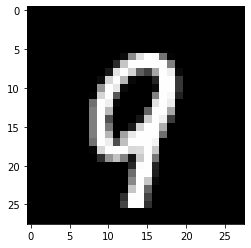

label= [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


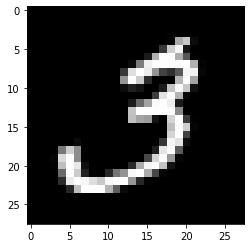

label= [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


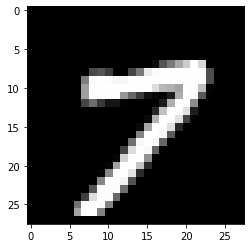

label= [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


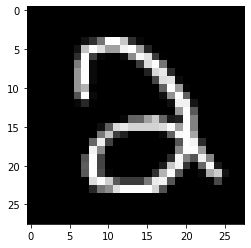

label= [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


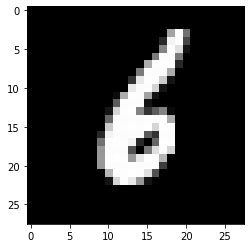

label= [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


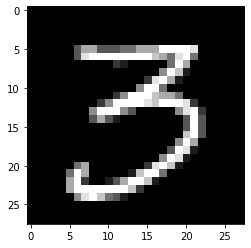

In [102]:
index_num = 3

index_sel = np.array(range(K))*Size_submatrices + index_num
# print(index_sel)

input_images = encoding_input_array_np[index_sel,:]
input_labels = encoding_label_array_np[index_sel,:]
for i in range(len(index_sel)):
    print('label=',input_labels[i,:])
    pixels = input_images[i,:].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

## 2.3. Encoded Images & Labels

(15, 10000, 784)
(15, 10000, 10)
(15, 784)
label= [ 0.     0.    -0.03  -0.148  0.     0.     0.022  0.051  0.     1.105]


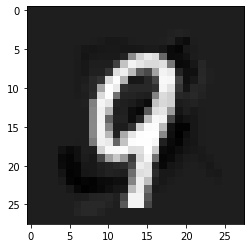

label= [ 0.     0.    -0.01  -0.053  0.     0.     0.008  0.018  0.     1.038]


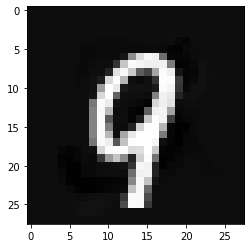

label= [ 0.     0.     0.037  0.232  0.     0.    -0.027 -0.066  0.     0.824]


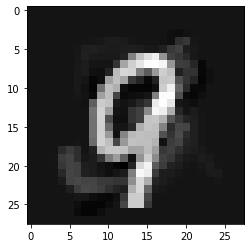

label= [ 0.     0.     0.062  0.682  0.     0.    -0.043 -0.12   0.     0.419]


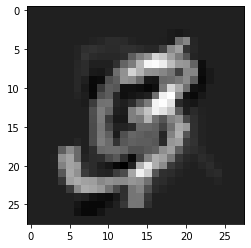

label= [ 0.     0.    -0.044  1.053  0.     0.     0.03   0.1    0.    -0.138]


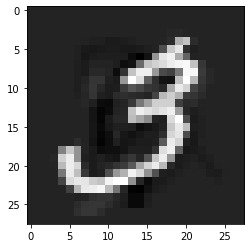

label= [ 0.     0.    -0.233  0.733  0.     0.     0.146  0.733  0.    -0.379]


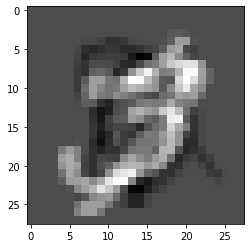

label= [ 0.     0.    -0.091  0.089  0.     0.     0.051  1.03   0.    -0.079]


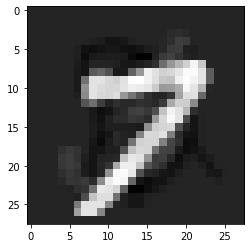

label= [ 0.     0.     0.326 -0.086  0.     0.    -0.146  0.768  0.     0.138]


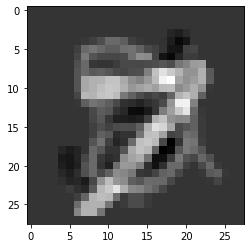

label= [ 0.     0.     0.768 -0.008  0.     0.    -0.197  0.326  0.     0.111]


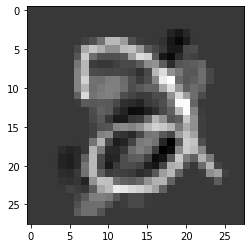

label= [ 0.     0.     1.03  -0.028  0.     0.     0.13  -0.091  0.    -0.041]


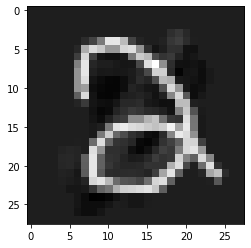

label= [ 0.     0.     0.733 -0.233  0.     0.     0.854 -0.233  0.    -0.121]


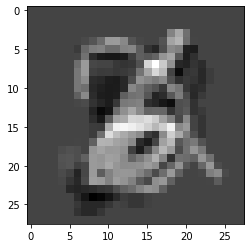

label= [ 0.     0.     0.1   -0.108  0.     0.     1.078 -0.044  0.    -0.025]


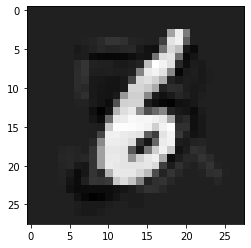

label= [ 0.     0.    -0.12   0.376  0.     0.     0.645  0.062  0.     0.037]


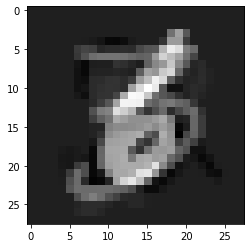

label= [ 0.     0.    -0.066  0.797  0.     0.     0.209  0.037  0.     0.023]


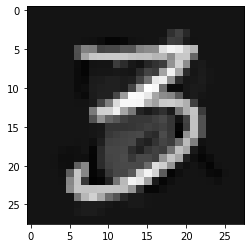

label= [ 0.     0.     0.018  1.046  0.     0.    -0.047 -0.01   0.    -0.007]


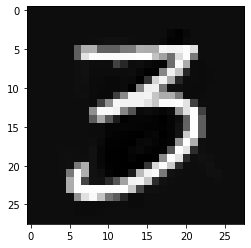

In [105]:
print(X_tilde.shape)
print(y_tilde.shape)
encoded_images = X_tilde[:,index_num,:]
encoded_labels = y_tilde[:,index_num,:]
print(encoded_images.shape)
np.set_printoptions(precision=3)

for i in range(encoded_images.shape[0]):
    print('label=', encoded_labels[i,:])
    pixels = encoded_images[i,:].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

# 3. BACC with noise

j:  [0.262 0.785 1.309 1.833 2.356 2.88  3.403 3.927 4.451] 

alpha_array:  [ 9.848e-01  8.660e-01  6.428e-01  3.420e-01  6.123e-17 -3.420e-01
 -6.428e-01 -8.660e-01 -9.848e-01] 

z_array:  [ 1.     0.978  0.914  0.809  0.669  0.5    0.309  0.105 -0.105 -0.309
 -0.5   -0.669 -0.809 -0.914 -0.978] 

Input:  [[ 0.215  0.322]
 [-0.699 -0.926]
 [ 0.028 -0.625]
 [-0.688 -0.146]
 [ 0.279 -0.869]
 [-0.807 -0.208]] 

@BACC_Enc: N,K,T, m_i= 15 6 3 1 

@BACC_Enc: N,K, m_i= 15 9 1 



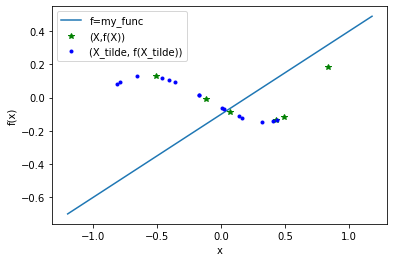

2
4
7


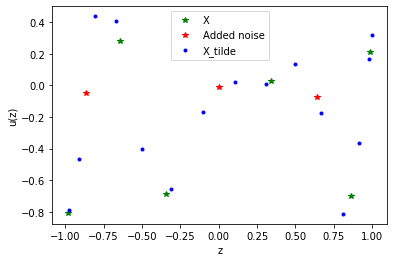

In [82]:
N =15
K = 6
T = 3
d = 2
sigma = 0.1

m_i = 1
m = K * m_i


# Z_i: noise information
_noise_idxs = [2,4,7]
added_noise = np.random.normal(0,sigma,size=(m_i*T,d))


j_array = np.array(range(K+T))
print("j: ",(2*j_array+1)*math.pi/2/K,'\n')

alpha_array = np.cos((2*j_array+1)*math.pi/(2*(K+T))) #np.cos((2*j_array+1)*math.pi/(2*K))
print("alpha_array: ",alpha_array,'\n')

i_array = np.array(range(N))
z_array = np.cos(i_array*2*math.pi/N/2) # np.cos(i_array*2*math.pi/N/2)
print("z_array: ",z_array,'\n')

def my_func(inputs):
    outputs = np.zeros(len(inputs))
    
    for i in range(len(inputs)):
        x = inputs[i]
#         outputs[i] =  0.5 * x - 0.1
        outputs[i] = - 0.2* x * np.cos(x) + 0.6*(x-0.55)*(x+0.25)*(x+0.75)
    return outputs


x_plot = (np.array(range(120))-60)/50
y_plot = my_func(my_inputs)

X_array = input_array[:,0]
Y_array = my_func(X_array)

input_array = np.random.uniform(low=-1.0, high=1.0, size=(m,d))

print("Input: ",input_array,'\n')

X_tilde, X_extended, noise_idxs = BACC_Enc_withNoise(input_array, N, K, T, sigma, _Noise_Alloc = _noise_idxs, _Noise = added_noise, is_predefined_noise=True)

# print(np.shape(X_tilde))
Y_tilde = my_func(X_tilde[:,0,0])

plt.plot(my_inputs, my_outputs, label='f=my_func')
plt.plot(X_array, Y_array, 'g*', label='(X,f(X))')
plt.plot(X_tilde[:,0,0], Y_tilde, 'b.', label='(X_tilde, f(X_tilde))')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

x_idxs = []
for i in range(K+T):
    if i in noise_idxs:
        print(i)
    else:
        x_idxs.append(i)
        
# print(noise_idxs)
# print(x_idxs)

plt.plot(alpha_array[x_idxs],X_extended[x_idxs,0],'g*',label='X')
plt.plot(alpha_array[noise_idxs],X_extended[noise_idxs,0],'r*',label='Added noise')
plt.plot(z_array,X_tilde[:,0,0],'b.',label='X_tilde')
plt.xlabel('z')
plt.ylabel('u(z)')
plt.legend()
plt.show()

Y_tilde = my_func(X_tilde[:,0,0])

f_tilde = Y_tilde
f_tilde = np.reshape(f_tilde,(N,1,1))

Y_array = my_func(X_extended[:,0])

@BACC_Enc: N,K,T, m_i= 1001 6 3 1 

@BACC_Enc: N,K, m_i= 1001 9 1 

(9,)
(6,)


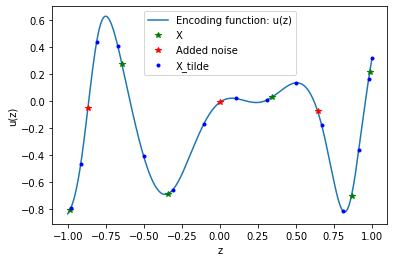

Number of received results = 15 (out of 15)
selected index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


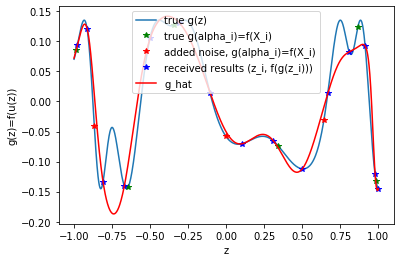

In [83]:
N_=1001

j_array_ = np.array(range(N_))
alpha_array_ = np.cos((2*j_array_+1)*math.pi/(2*N_)) #np.cos((2*j_array+1)*math.pi/(2*K))
alpha_idx = np.argsort(alpha_array_)
# print(alpha_array_[alpha_idx])

X_tilde_, X_extended, noise_idxs = BACC_Enc_withNoise(input_array, N_, K, T, sigma, _Noise_Alloc = _noise_idxs, _Noise = added_noise, is_predefined_noise=True)
Y_tilde_ = my_func(X_tilde_[:,0,0])

print(np.shape(alpha_array))
print(np.shape(input_array[:,0]))

plt.plot(alpha_array_,X_tilde_[:,0,0],label='Encoding function: u(z)')
plt.plot(alpha_array[x_idxs],X_extended[x_idxs,0],'g*',label='X')
plt.plot(alpha_array[noise_idxs],X_extended[noise_idxs,0],'r*',label='Added noise')
plt.plot(z_array,X_tilde[:,0,0],'b.',label='X_tilde')
plt.xlabel('z')
plt.ylabel('u(z)')
plt.legend()
plt.show()

print("Number of received results = 15 (out of 15)")
idxs_users = np.random.choice(range(N), 15, replace=False)
idxs_users = np.sort(idxs_users)
print("selected index:", idxs_users)

f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
plt.plot(alpha_array[x_idxs],Y_array[x_idxs],'g*',label='true g(alpha_i)=f(X_i)')
plt.plot(alpha_array[noise_idxs],Y_array[noise_idxs],'r*',label='added noise, g(alpha_i)=f(X_i)')
plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
plt.xlabel('z')
plt.ylabel('g(z)=f(u(z))')
plt.legend()
plt.show()

# print("Number of received results = 6 (out of 15)")
# # idxs_users = np.random.choice(range(N), 6, replace=False)
# idxs_users = np.array([  3, 1, 6,    7,  9, 11])
# print("selected index:", idxs_users)

# f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
# plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
# plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
# plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
# plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
# plt.xlabel('z')
# plt.ylabel('g(z)=f(u(z))')
# plt.ylim([-1,1.2])
# plt.legend()
# plt.show()

# print("Number of received results = 6 (out of 15)")
# idxs_users = np.sort(idxs_users)
# print("selected index:", idxs_users)

# f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
# plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
# plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
# plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
# plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
# plt.xlabel('z')
# plt.ylabel('g(z)=f(u(z))')
# plt.legend()
# plt.show()


## 3.1. Encoding MNIST dataset

In [68]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import copy
import numpy as np
from torchvision import datasets, transforms
import torch

from utils.sampling import mnist_iid, mnist_noniid, cifar_iid
from utils.options import args_parser
from models.Update import LocalUpdate
from models.Nets import MLP, CNNMnist, CNNCifar, LeNet, CNNMnist2
from models.Fed import FedAvg
from models.Fed import FedQAvg, Quantization, Quantization_Finite, my_score, my_score_Finite
from models.test import test_img
from torch.utils.data import DataLoader, Dataset

%load_ext autoreload
%autoreload 2

class DatasetSplit(Dataset):
    def __init__(self, dataset, idxs):
        self.dataset = dataset
        self.idxs = list(idxs)

    def __len__(self):
        return len(self.idxs)

    def __getitem__(self, item):
        image, label = self.dataset[self.idxs[item]]
        return image, label

class my_argument:    
    epochs = 200    #"rounds of training"
    num_users = 15  # "number of users: N"
    num_partition = 6 # "number of users: K"
    frac = 0.5 #"the fraction of clients: C"
    local_ep = 1 #"the number of local epochs: E"
    local_bs = 200 #"local batch size: B"
    bs=200 #"test batch size"
    lr=0.01 #"learning rate"
    momentum=0.5 # "SGD momentum (default: 0.5)"
    split='user' # "train-test split type, user or sample"
    opt='ADAM'
    loss='Custom' # 'Custom' or 'Default'

    # model arguments
    model = 'cnn'
    kernel_num=9 #, help='number of each kind of kernel')
    kernel_sizes='3,4,5' #  help='comma-separated kernel size to use for convolution')
    norm='None' #, help="batch_norm, layer_norm, or None")
    num_filters=32 #, help="number of filters for conv nets")
    max_pool='True' #help="Whether use max pooling rather than strided convolutions")

    # other arguments
    dataset='mnist' #, help="name of dataset")
    iid=1
    num_classes=10#, help="number of classes")
    num_channels=1#, help="number of channels of imges")
    gpu=1#, help="GPU ID, -1 for CPU")
    stopping_rounds=10#, help='rounds of early stopping')
    verbose='False'#, help='verbose print')
    seed=1#, help='random seed (default: 1)')
    
args = my_argument()

args.device = torch.device('cuda:{}'.format(args.gpu) if torch.cuda.is_available() and args.gpu != -1 else 'cpu')

# load dataset and split users
trans_mnist = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
dataset_train = datasets.MNIST('../data/mnist/', train=True, download=True, transform=trans_mnist)
dataset_test = datasets.MNIST('../data/mnist/', train=False, download=True, transform=trans_mnist)

dict_users = mnist_iid(dataset_train, args.num_partition)

encoding_input_array_np = np.empty((len(dataset_train),28*28))
encoding_label_array_np = np.empty((len(dataset_train),args.num_classes))
print("size of X:" ,encoding_input_array_np.shape)
print("size of Y:" ,encoding_label_array_np.shape)

Size_submatrices = int(60000/args.num_partition)

for i in range(args.num_partition):
    
    stt_pos = i*Size_submatrices
    end_pos = (i+1)*Size_submatrices
#     print(i,stt_pos,end_pos)
    Temp_train = DataLoader(DatasetSplit(dataset_train, dict_users[i]), batch_size=Size_submatrices, shuffle=True)
    
    for batch_idx, (images, labels) in enumerate(Temp_train):
        
        images_np = images.detach().cpu().numpy()
        encoding_input_array_np[stt_pos:end_pos,:] = np.reshape(images_np, (Size_submatrices,28*28))
#         print(encoding_input_array_np[stt_pos:end_pos,:].shape)

        onehot_labels = torch.nn.functional.one_hot(labels,num_classes=args.num_classes)
        labels_np = onehot_labels.detach().cpu().numpy()
#         print(labels_np.shape)
        encoding_label_array_np[stt_pos:end_pos,:] = labels_np


# print(labels_np[0:10,:])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
size of X: (60000, 784)
size of Y: (60000, 10)


In [72]:
print(np.max(encoding_input_array_np), np.min(encoding_input_array_np))
print(np.mean(encoding_input_array_np))

2.821486711502075 -0.4242129623889923
-0.0001282926419238658


### 3.1.1 T=3, Sigma=0.1

In [77]:
from utils.functions import *
import math

N = args.num_users
K = args.num_partition
T = 3
sigma = 0.1

j_array = np.array(range(K))
# print("j: ",(2*j_array+1)*math.pi/2/K,'\n')

alpha_array = np.cos((2*j_array+1)*math.pi/(2*K)) #np.cos((2*j_array+1)*math.pi/(2*K))
print("alpha_array: ",alpha_array,'\n')

i_array = np.array(range(N))
z_array = np.cos(i_array*2*math.pi/N/2) # np.cos(i_array*2*math.pi/N/2)
print("z_array: ",z_array,'\n')

Noise_Alloc = [2,4,6]
X_tilde,a,b = BACC_Enc_withNoise(encoding_input_array_np, N, K, T, sigma, _Noise_Alloc = Noise_Alloc) #BACC_Enc(encoding_input_array_np, alpha_array, z_array)
y_tilde,a,b = BACC_Enc_withNoise(encoding_label_array_np, N, K, T, sigma, _Noise_Alloc = Noise_Alloc) #BACC_Enc(encoding_label_array_np, alpha_array, z_array)

alpha_array:  [ 0.96592583  0.70710678  0.25881905 -0.25881905 -0.70710678 -0.96592583] 

z_array:  [ 1.          0.9781476   0.91354546  0.80901699  0.66913061  0.5
  0.30901699  0.10452846 -0.10452846 -0.30901699 -0.5        -0.66913061
 -0.80901699 -0.91354546 -0.9781476 ] 

@BACC_Enc: N,K,T, m_i= 15 6 3 10000 

@BACC_Enc: N,K, m_i= 15 9 10000 

@BACC_Enc: N,K,T, m_i= 15 6 3 10000 

@BACC_Enc: N,K, m_i= 15 9 10000 



Input images & labels
label= [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


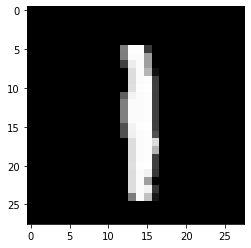

label= [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


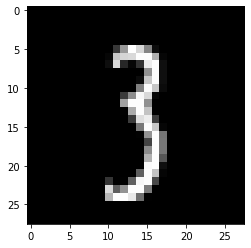

label= [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


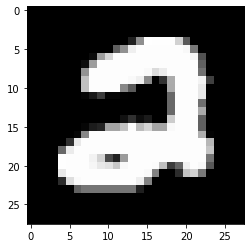

label= [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


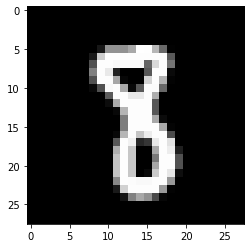

label= [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


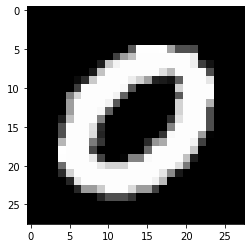

label= [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


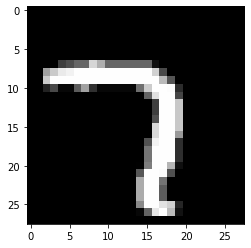




Encoded images & labels
label= [-0.014  1.088 -0.024 -0.123 -0.007 -0.004  0.008  0.011 -0.016  0.007]


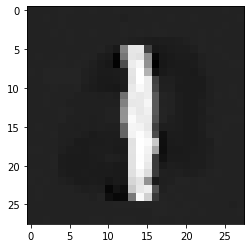

label= [ 0.005  0.958  0.009  0.057  0.003  0.002 -0.003 -0.004  0.006 -0.003]


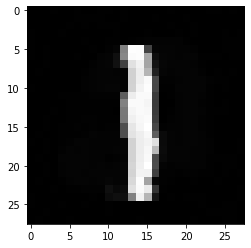

label= [ 0.029  0.436  0.051  0.652  0.018  0.009 -0.019 -0.021  0.033 -0.016]


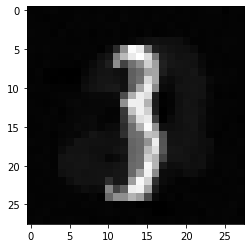

label= [-0.07  -0.333 -0.117  1.044 -0.059 -0.029  0.06   0.044 -0.077  0.046]


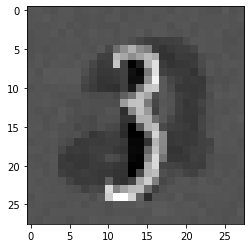

label= [-0.107 -0.03  -0.048  0.095 -0.174 -0.083  0.168  0.024 -0.096  0.102]


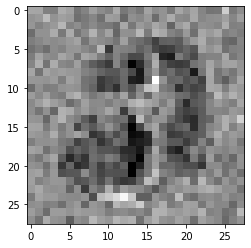

label= [ 0.008  0.262  0.599 -0.309 -0.12  -0.055  0.112 -0.083  0.059  0.033]


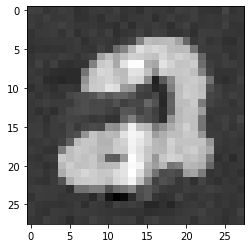

label= [-0.016 -0.074  0.993  0.084  0.021  0.009 -0.022  0.039 -0.04   0.007]


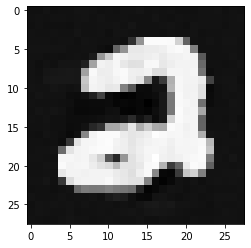

label= [-0.01  -0.245  0.332  0.297  0.043  0.017 -0.095  0.187 -0.142  0.112]


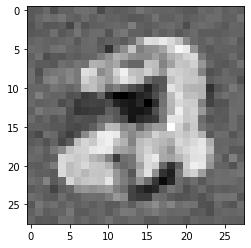

label= [ 0.245 -0.001 -0.261  0.088 -0.035 -0.014 -0.094 -0.007  0.456  0.133]


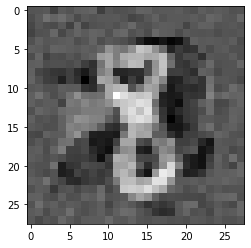

label= [ 0.092  0.028 -0.063 -0.002 -0.015 -0.005 -0.021 -0.039  1.018  0.017]


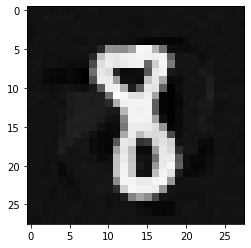

label= [-0.415 -0.133  0.162 -0.002  0.073  0.021  0.111  0.186  0.486 -0.019]


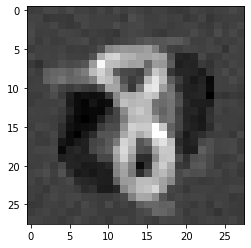

label= [-0.106 -0.132  0.046 -0.065  0.09   0.021  0.166 -0.047 -0.204  0.032]


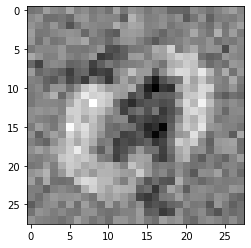

label= [ 0.965 -0.026 -0.029 -0.042  0.026  0.005  0.059 -0.32  -0.171  0.023]


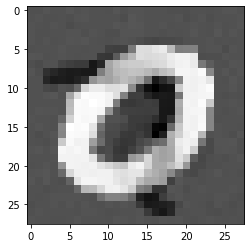

label= [ 0.679  0.003  0.018  0.018 -0.007 -0.001 -0.019  0.428  0.068 -0.01 ]


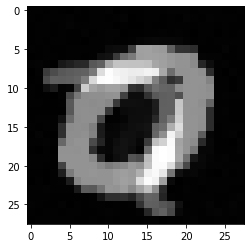

label= [ 6.111e-02  1.128e-04  3.690e-03  3.338e-03 -1.093e-03 -9.299e-05
 -3.176e-03  9.562e-01  1.221e-02 -1.783e-03]


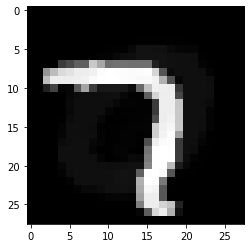

In [80]:


index_num = 100

index_sel = np.array(range(K))*Size_submatrices + index_num
# print(index_sel)

input_images = encoding_input_array_np[index_sel,:]
input_labels = encoding_label_array_np[index_sel,:]

print("Input images & labels")
for i in range(len(index_sel)):
    print('label=',input_labels[i,:])
    pixels = input_images[i,:].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
print("\n\n")
    
    
print("Encoded images & labels")
# print(X_tilde.shape)
# print(y_tilde.shape)
encoded_images = X_tilde[:,index_num,:]
encoded_labels = y_tilde[:,index_num,:]
# print(encoded_images.shape)
np.set_printoptions(precision=3)

for i in range(encoded_images.shape[0]):
    print('label=', encoded_labels[i,:])
    pixels = encoded_images[i,:].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [89]:
from utils.functions import *
import math

N = args.num_users
K = args.num_partition
T = 8

if T == 0:
    Noise_Alloc = []
elif T == 1:
    Noise_Alloc = [0]
elif T == 2:
    Noise_Alloc = [0,2]
elif T == 3:
    Noise_Alloc = [0,2,4]
elif T == 4:
    Noise_Alloc = [1,3,5,7]
elif T == 5:
    Noise_Alloc = [1,3,5,7,9]
elif T == 6:
    Noise_Alloc = [1,3,5,7,9,11]
elif T == 7:
    Noise_Alloc = [1,3,5,7,9,11,12] # np.random.choice(range(K+T), T, replace=False)
elif T == 8:
    Noise_Alloc = [0,2,4,6,7,9,11,13] # np.random.choice(range(K+T), T, replace=False)
elif T == 9:
    Noise_Alloc = [0,2,4,5,7,9,10,12,14] # np.random.choice(range(K+T), T, replace=False)
elif T == 10:
    Noise_Alloc = [0,2,4,5,7,8,10,11,13,15] # np.random.choice(range(K+T), T, replace=False)
elif T == 11:
    Noise_Alloc = [0,2,4,5,7,8,10,11,13,15,16] # np.random.choice(range(K+T), T, replace=False)
else:
    Noise_Alloc = np.random.choice(range(K+T), T, replace=False)

sigma = 1

j_array = np.array(range(K))
# print("j: ",(2*j_array+1)*math.pi/2/K,'\n')

alpha_array = np.cos((2*j_array+1)*math.pi/(2*K)) #np.cos((2*j_array+1)*math.pi/(2*K))
print("alpha_array: ",alpha_array,'\n')

i_array = np.array(range(N))
z_array = np.cos(i_array*2*math.pi/N/2) # np.cos(i_array*2*math.pi/N/2)
print("z_array: ",z_array,'\n')

X_tilde,a,b = BACC_Enc_withNoise(encoding_input_array_np, N, K, T, sigma, _Noise_Alloc = Noise_Alloc) #BACC_Enc(encoding_input_array_np, alpha_array, z_array)
y_tilde,a,b = BACC_Enc_withNoise(encoding_label_array_np, N, K, T, sigma, _Noise_Alloc = Noise_Alloc) #BACC_Enc(encoding_label_array_np, alpha_array, z_array)





alpha_array:  [ 0.966  0.707  0.259 -0.259 -0.707 -0.966] 

z_array:  [ 1.     0.978  0.914  0.809  0.669  0.5    0.309  0.105 -0.105 -0.309
 -0.5   -0.669 -0.809 -0.914 -0.978] 

@BACC_Enc: N,K,T, m_i= 15 6 8 10000 

@BACC_Enc: N,K,T, m_i= 15 6 8 10000 



Input images & labels
label= [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


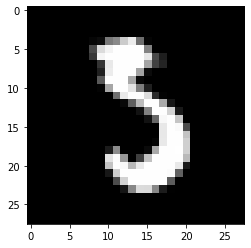

label= [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


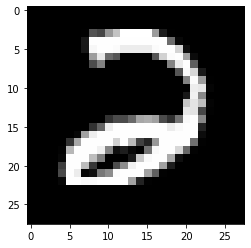

label= [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


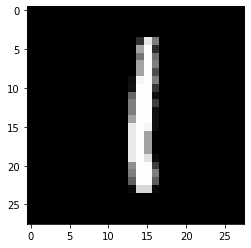

label= [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


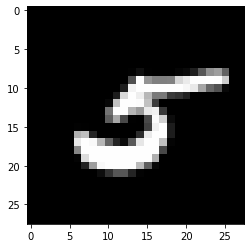

label= [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


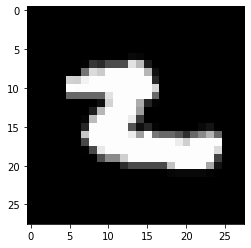

label= [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


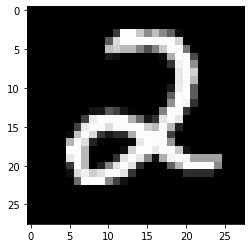

In [90]:
index_num = 3

index_sel = np.array(range(K))*Size_submatrices + index_num
# print(index_sel)

input_images = encoding_input_array_np[index_sel,:]
input_labels = encoding_label_array_np[index_sel,:]

print("Input images & labels")
for i in range(len(index_sel)):
    print('label=',input_labels[i,:])
    pixels = input_images[i,:].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
print("\n\n")
    
    


Encoded images & labels
label= [-1.306 -1.549  0.502 -1.389  0.726 -0.069  0.79   0.54  -0.348 -0.138]


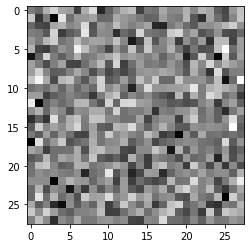

label= [-0.805 -0.957  0.411 -0.516  0.524 -0.044  0.547  0.333 -0.09  -0.189]


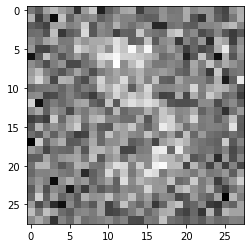

label= [ 0.267  0.381 -0.466  1.562 -0.401 -0.158 -0.349 -0.087 -0.327  0.463]


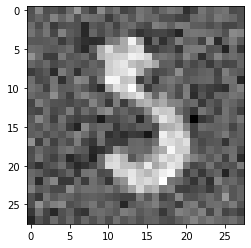

label= [-0.318 -0.038 -0.054 -0.062  0.04  -1.044  0.199  0.214 -0.249  0.683]


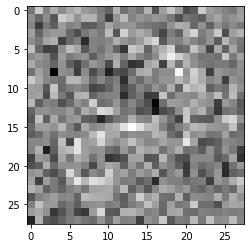

label= [ 0.037 -0.256  1.317  0.008 -0.275  0.9   -0.405 -0.01  -0.376 -0.152]


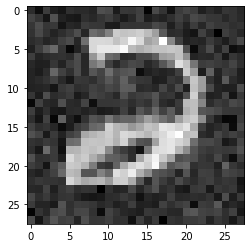

label= [-0.289 -0.9    0.99  -0.569 -1.222  1.882 -1.689  0.374 -1.406  0.196]


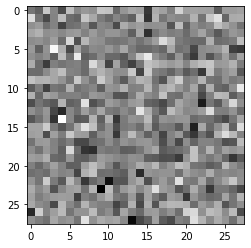

label= [ 0.001  1.199 -0.084  0.074  0.311 -0.03   0.358 -0.022  0.048 -0.055]


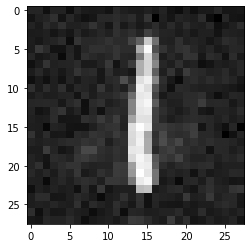

label= [-0.205  0.741  0.277  0.373  2.115  1.314  1.675  0.302 -0.956  0.328]


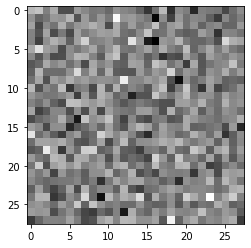

label= [ 0.46  -0.44   0.464  1.461 -0.73   0.058 -0.697 -1.771  0.417  1.123]


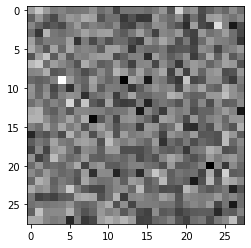

label= [ 0.052 -0.202 -0.077  0.207 -0.389  0.847 -0.237 -0.507  0.124  0.148]


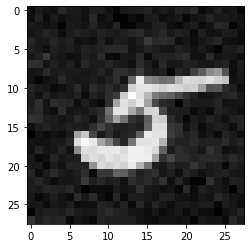

label= [-0.171  1.278  1.07  -0.44   1.69   0.421  1.573  1.946  0.248 -0.654]


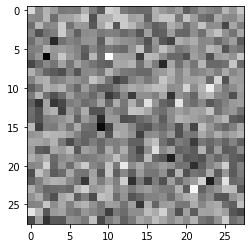

label= [-0.274  0.053  1.183 -0.04  -0.064 -0.493  0.764 -0.215  0.301 -0.146]


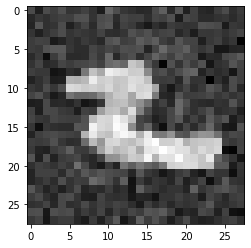

label= [ 0.826  0.664  0.687  0.308  1.292  1.065 -1.591  1.536 -0.051 -0.113]


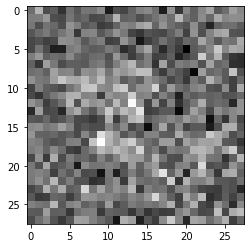

label= [ 0.057 -0.104  0.701  0.334  0.874  0.153 -0.744  0.362  0.566 -0.434]


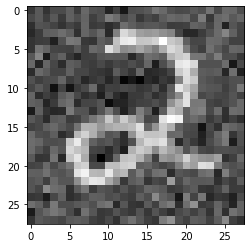

label= [ 0.614  0.954  1.353 -0.159 -0.229  0.331  0.125  0.726 -0.631  0.498]


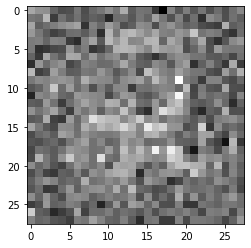

In [91]:
print("Encoded images & labels")
# print(X_tilde.shape)
# print(y_tilde.shape)
encoded_images = X_tilde[:,index_num,:]
encoded_labels = y_tilde[:,index_num,:]
# print(encoded_images.shape)
np.set_printoptions(precision=3)

for i in range(encoded_images.shape[0]):
    print('label=', encoded_labels[i,:])
    pixels = encoded_images[i,:].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()